In [1]:
 ! pip install dask
 ! pip install graphviz

In [2]:
# importing the multiprocessing module 
import multiprocessing 
import os
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

def print_square(num): 
    """ 
    function to print square of given num 
    """
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # starting process 1 
    p1.start() 
    # starting process 2 
    p2.start() 

    # wait until process 1 is finished 
    p1.join() 
    # wait until process 2 is finished 
    p2.join() 

    # both processes finished 
    print("Done!") 


123
Square: 100
126
Cube: 1000
Done!


In [3]:
from time import sleep

def apply_discount(x):
    sleep(1)
    x = x - 0.3*x
    return x

def get_total(a,b):
    sleep(1)
    return a+b

def total_price(x,y):
    sleep(1)
    a = apply_discount(x)
    b = apply_discount(y)
    print(get_total(a,b))

In [4]:
%%time
a = apply_discount(1000)
b = apply_discount(1000)
get_total(a,b)

CPU times: user 14.9 ms, sys: 2.69 ms, total: 17.6 ms
Wall time: 3 s


In [5]:
import dask
from dask import delayed

x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.visualize()


z.compute()

2450.0


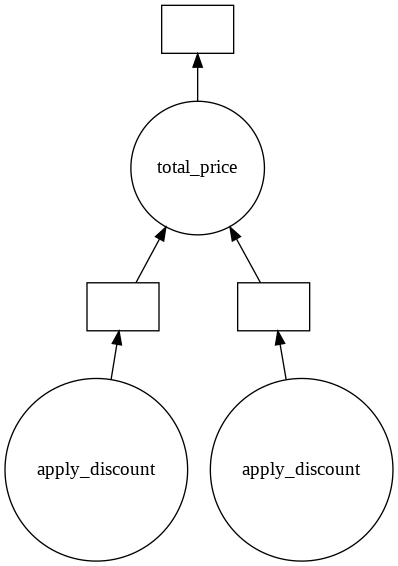

In [6]:
z.visualize()

In [7]:
# Functions to perform mathematics operations
def square(x):
    return x*x

def double(x):
    return x*2

def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

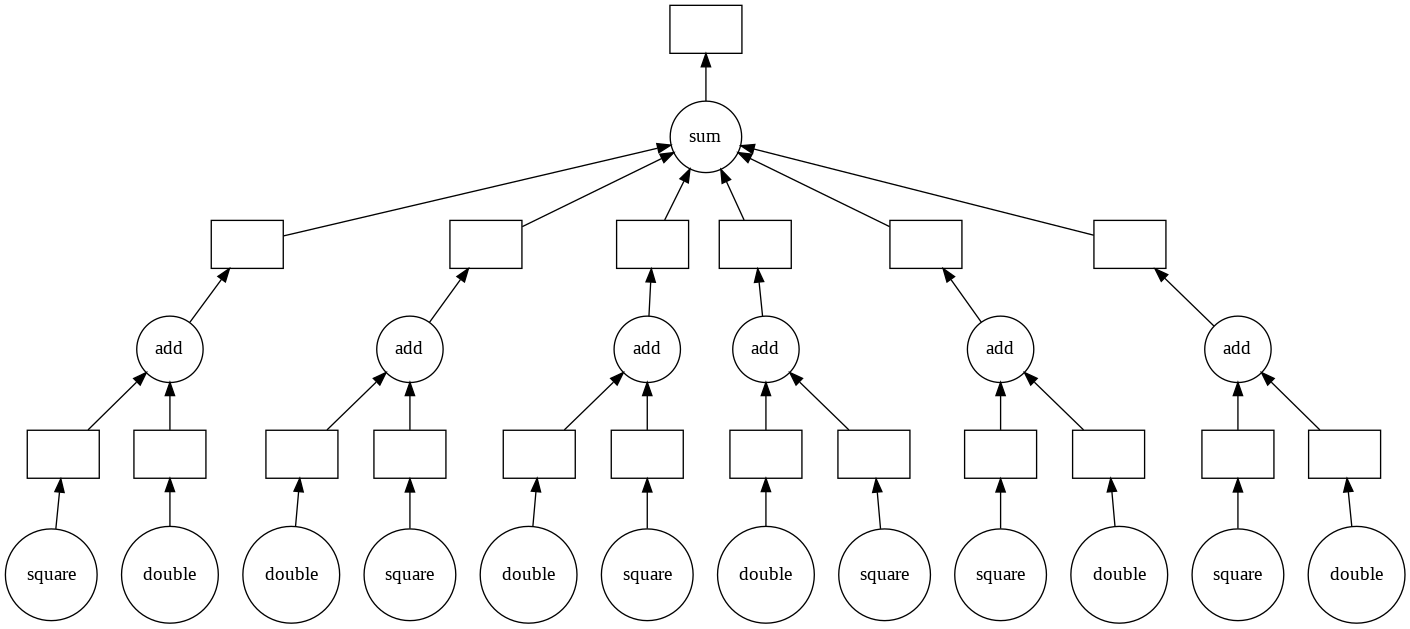

In [8]:
total = delayed(sum)(output)
total.visualize()

In [9]:
import concurrent

In [10]:
import multiprocessing
multiprocessing.cpu_count()

2

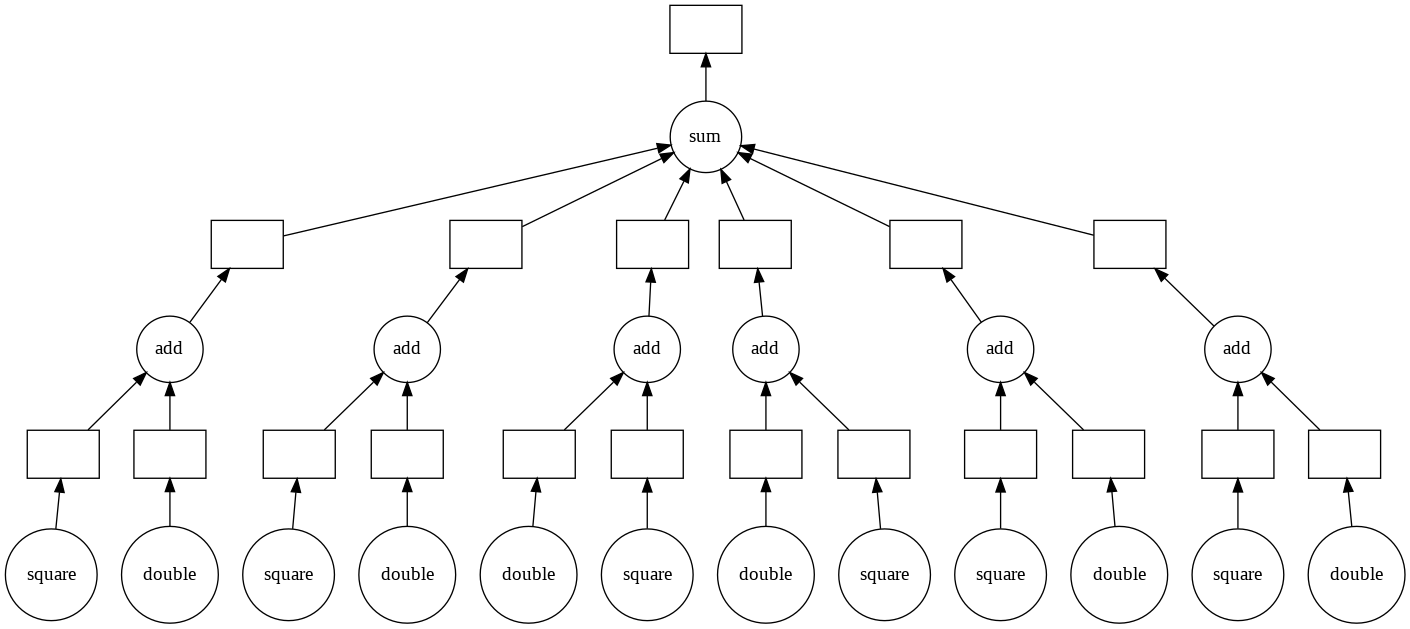

In [11]:
# Functions to perform mathematics operations
@delayed
def square(x):
    return x*x
@delayed
def double(x):
    return x*2
@delayed
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = delayed(sum)(output)
total.visualize()

In [17]:
!pip install dask[dataframe] --upgrade

     |████████████████████████████████| 942kB 4.4MB/s 
     |████████████████████████████████| 112kB 12.9MB/s 
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [1]:
import dask.dataframe as dd

In [3]:
import dask

In [4]:
dask.__version__

'2021.04.0'

In [5]:
df = dask.datasets.timeseries()

In [6]:
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [7]:
df.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1018,George,0.534234,0.815056
2000-01-01 00:00:01,1000,Alice,0.183275,0.203861
2000-01-01 00:00:02,991,Edith,0.678551,0.113874
2000-01-01 00:00:03,1035,Victor,-0.803362,-0.267697
2000-01-01 00:00:04,1009,Ray,0.810549,0.518226


In [8]:
df1 = df.groupby('name').y.std()

In [9]:
df1

Dask Series Structure:
npartitions=1
    float64
        ...
Name: y, dtype: float64
Dask Name: sqrt, 67 tasks

In [10]:
df1.compute()

name
Alice       0.577440
Bob         0.576838
Charlie     0.577277
Dan         0.578512
Edith       0.577046
Frank       0.576667
George      0.577341
Hannah      0.578466
Ingrid      0.578222
Jerry       0.578687
Kevin       0.579677
Laura       0.576918
Michael     0.576715
Norbert     0.578582
Oliver      0.577239
Patricia    0.578888
Quinn       0.577772
Ray         0.577540
Sarah       0.576982
Tim         0.577696
Ursula      0.578287
Victor      0.575401
Wendy       0.578684
Xavier      0.578577
Yvonne      0.577824
Zelda       0.576656
Name: y, dtype: float64

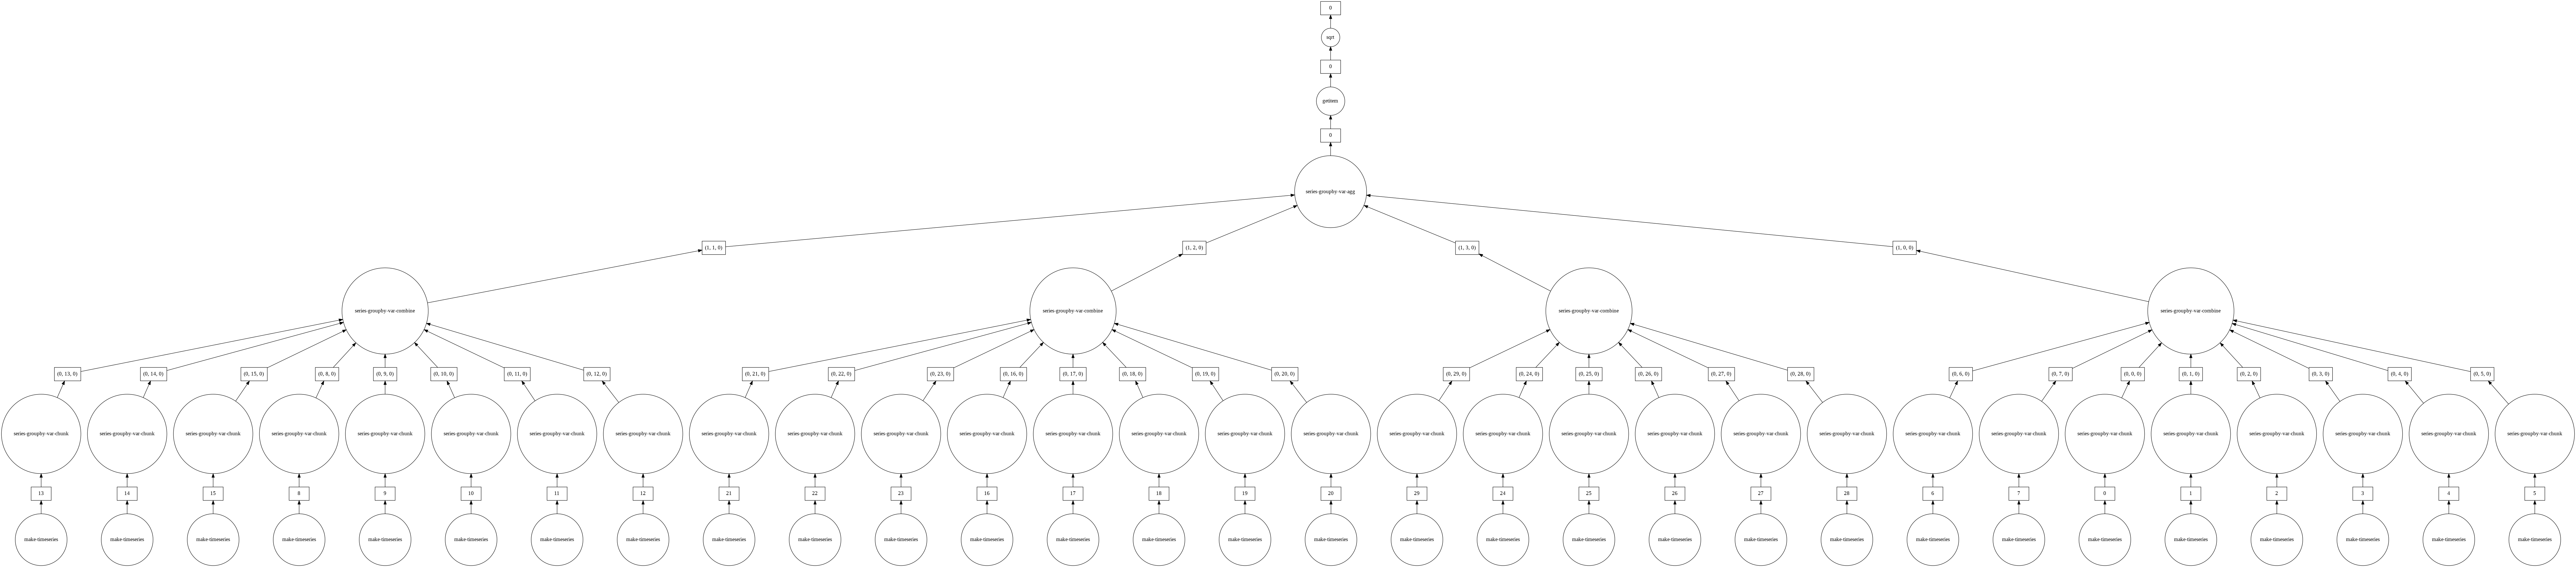

In [11]:
df1.visualize()

In [12]:
%time
df.loc['2000-01-01']

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


,id,name,x,y
npartitions=1,,,,
2000-01-01 00:00:00.000000000,int64,object,float64,float64
2000-01-01 23:59:59.999999999,...,...,...,...


In [13]:
df = df.persist()

In [14]:
%time
df.loc['2000-01-01'].compute()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1018,George,0.534234,0.815056
2000-01-01 00:00:01,1000,Alice,0.183275,0.203861
2000-01-01 00:00:02,991,Edith,0.678551,0.113874
2000-01-01 00:00:03,1035,Victor,-0.803362,-0.267697
2000-01-01 00:00:04,1009,Ray,0.810549,0.518226
...,...,...,...,...
2000-01-01 23:59:55,958,Xavier,0.785039,-0.096934
2000-01-01 23:59:56,1000,Frank,0.722178,-0.468145
2000-01-01 23:59:57,965,George,0.477241,0.003775


In [15]:
dask_bag = dask.bag.from_sequence(['I', 'am', 'learning', 'dask'], partition_size = 2)

dask_bag.visualize() #--->[0] [1]

AttributeError: ignored

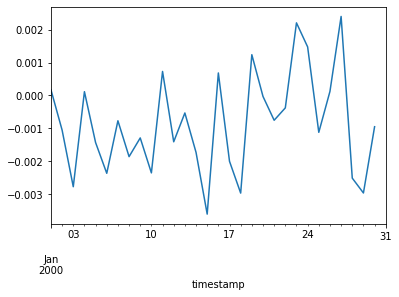

In [16]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [17]:
len(df)

2592000

In [22]:
from dask.distributed import Client
import pandas as pd
import time
import numpy as np

In [23]:
client = Client(processes = False)

/usr/local/lib/python3.7/dist-packages/distributed/deploy/local.py:197: UserWarning: 
Could not launch service 'bokeh' on port 8787. Got the following message:

failed to validate _ServerOpts(...).prefix: expected a value of type str, got None of type NoneType
  self.scheduler.start(scheduler_address)


ValueError: ignored

In [ ]:
client

Client Scheduler: inproc://172.16.10.157/9792/1 Dashboard: http://172.16.10.157:8787/status,Cluster Workers: 1 Cores: 4 Memory: 17.06 GB


In [24]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

,param_a,param_b,param_c,param_d
0,0.743903,0.745786,0.075477,0.867432
1,0.923267,0.370384,0.264556,0.758172
2,0.202537,0.268235,0.564655,0.957135
3,0.730556,0.678023,0.114122,0.466622
4,0.785601,0.557910,0.079692,0.880540


In [25]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [26]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

CPU times: user 7.79 s, sys: 173 ms, total: 7.96 s
Wall time: 19.1 s


In [27]:
results

[4998680.992051905, 4999432.712650512, 5000156.125483094, 5000246.629704627]

In [28]:
import dask

In [29]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

CPU times: user 1.07 ms, sys: 6 µs, total: 1.08 ms
Wall time: 1.09 ms


In [30]:
results[0]

Delayed('costly_simulation-249bca05-d9f5-4f18-a73c-5883ff02331e')

In [31]:
%time dask.compute(*results)

/usr/local/lib/python3.7/dist-packages/distributed/worker.py:2791: UserWarning: Large object of size 80.00 MB detected in task graph: 
  (array([0.74390265, 0.9232666 , 0.20253664, ..., 0 ...  0.725843  ]),)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s))


KeyboardInterrupt: ignored